In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem-1

In [2]:
N = 1000
lr = 0.02

### Part-a

In [3]:
A = np.array([
    [2, -1, -1],
    [-1, 2, 0],
    [-1, 0, 1]
])
b = 1

def func_1a(x):
    return x.T@A@x + b

def grad_func_1a(x):
    return (A+A.T)@x

x0 = np.random.rand(3)
x = x0
for itr in range(N):
    delta_x = -lr*grad_func_1a(x)
    x += delta_x

print(f'x obtained after {N} iterations = {x}')
print(f'The function value at optimal x: {func_1a(x):.3f}')

x obtained after 1000 iterations = [0.00021397 0.00011874 0.00026681]
The function value at optimal x: 1.000


The gradient is given as
$$\nabla f(x) = (A+A^T)x$$
It will be zero at $x=0$ (trivially). The matrix $A$ is also PD(eigen values > 0, shown below), so the solution is global optima.

In [4]:
print(f'The eigen values are given as {np.linalg.eigh(A)[0]}')

The eigen values are given as [0.19806226 1.55495813 3.2469796 ]


### Part-b

In [5]:
A = np.array([
    [1, 2],
    [2, 4],
    [3, 1]
])
b = np.array([1, 3, 1])

def func_1b(x):
    """
    same as x.T A.T A x - 2b.T A x + b.T b
    """
    vec = A@x - b
    return np.linalg.norm(vec)**2


def grad_func_1b(x):
    return 2*(A.T@A@x - A.T@b)


x0 = np.random.rand(2)
x = x0

for itr in range(N):
    delta_x = -lr*grad_func_1b(x)
    x += delta_x

print(f'x obtained after {N} iterations = {x}')
print(f'The function value at optimal x: {func_1b(x):.3f}')

x obtained after 1000 iterations = [0.12 0.64]
The function value at optimal x: 0.200


The gradient is
$$\nabla f(x) = 2(AA^Tx-A^Tb)$$

Setting gradient to $0$ gives us

$$x = (A^TA)^{-1}A^Tb$$

The hessian is a gram matrix which means it is PSD, so the solution obtained would be global optima.

In [6]:
x = np.linalg.inv(A.T@A)@A.T@b
print(f'The solution obtained using setting gradient to 0 gives us: x={x}')

The solution obtained using setting gradient to 0 gives us: x=[0.12 0.64]


### Part-c

In [7]:
# Note that I had to decrease the learning rate (by factor of 0.1) for convergence

A = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [3, 1, 9],
    [4, 1, 0],
    [2, 1, 4]
])
b = np.array([1, 3, 1, 0, 9])

def func_1c(x):
    """
    same as x.T A.T A x - 2b.T A x + b.T b
    """
    vec = A@x - b
    return np.linalg.norm(vec)**2


def grad_func_1c(x):
    return 2*(A.T@A@x - A.T@b)


x0 = np.random.rand(3)
x = x0
lr *= 0.1

for itr in range(N):
    delta_x = -lr*grad_func_1b(x)
    x += delta_x

print(f'x obtained after {N} iterations = {x}')
print(f'The function value at optimal x: {func_1c(x):.3f}')

x obtained after 1000 iterations = [0.05744939 0.65686105 0.33915902]
The function value at optimal x: 56.990


The gradient is
$$\nabla f(x) = 2(AA^Tx-A^Tb)$$

Setting gradient to $0$ gives us

$$x = (A^TA)^{-1}A^Tb$$

The hessian is a gram matrix which means it is PSD, so the solution obtained would be global optima.

In [8]:
x = np.linalg.inv(A.T@A)@A.T@b
print(f'The solution obtained using setting gradient to 0 gives us: x={x}')

The solution obtained using setting gradient to 0 gives us: x=[0.05744939 0.65686105 0.33915902]


# Problem-2

In [9]:
from sklearn.datasets import make_spd_matrix

A = make_spd_matrix(10)
b = np.random.rand(10)
c = np.random.rand()

The gradient is given by
$$(A+A^T)x-2b$$
Since $A$ is symmetric, positive definite because we used `make_spd_matrix` method that generates **symmetric** PD matrix, we can write the above as
$$2(Ax-b)$$

### Part-a

In [10]:
def func_2(x):
    return x.T@A@x - 2*b.T@x + c

In [11]:
optimal_x = np.linalg.inv(A)@b
print(f'The minima occurs at x={optimal_x}')
print(f'The function value at optimal x: {func_2(optimal_x):.3f}')

The minima occurs at x=[1.3923175  1.38211218 1.50301102 1.97047876 1.69594029 0.86316688
 0.89764752 0.74839891 1.07504735 2.56628872]
The function value at optimal x: -6.312


Note that Positive definite matrices are always invertible.

### Part-b

In [12]:
x0 = np.ones(10)/10 # initializing at 1/10
x = x0
spec_norm_A = np.linalg.norm(A, ord=2)
norm_b = np.linalg.norm(b)
lr = 1/(2*spec_norm_A+norm_b)

N = 1_000
x_vals = [x0.copy()]
print(x_vals)
def func_2b(x):
    return x.T@A@x-2*b.T@x+c

def grad_func_2b(x):
    return 2*(A@x-b)

for itr in range(N):
    delta_x = -lr*grad_func_2b(x)
    x += delta_x
    x_vals.append(x.copy())

print(f'x obtained after {N} iterations = {x}')
print(f'The function value at optimal x: {func_2(x):.3f}')


[array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])]
x obtained after 1000 iterations = [1.39231746 1.38211213 1.50301113 1.97047874 1.69594039 0.86316669
 0.89764737 0.74839893 1.07504732 2.56628875]
The function value at optimal x: -6.312


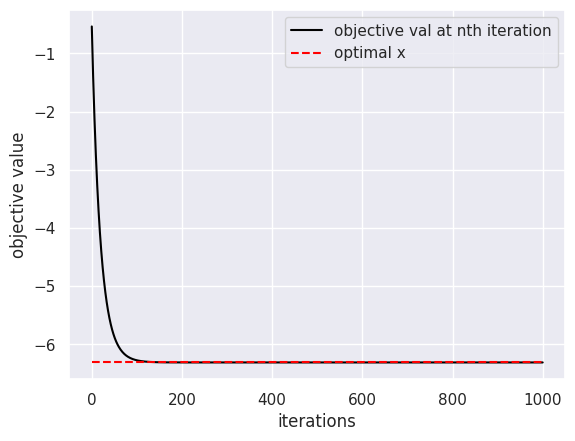

In [13]:
import seaborn as sns

sns.set()
plt.plot(np.arange(N+1), [func_2b(i) for i in x_vals], color='black', label='objective val at nth iteration')
plt.plot([0, 1000], (func_2b(optimal_x), )*2, label='optimal x', color='red', linestyle='dashed')
plt.xlabel('iterations')
plt.ylabel('objective value')
plt.legend()
plt.show()
